In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from drivers import drivers
%matplotlib inline

In [2]:
struct_newton_direct = drivers.driver(1e-6,staggered=False,it_solve=True,mode='newton')
staggered_struct = drivers.driver(1e-4,staggered=True,it_solve=True)
struct_fsolve = drivers.driver(1e-6,staggered=False,it_solve=True)
struct_newton_gmres = drivers.driver(1e-6,staggered=False,it_solve=True,mode='newton',lin_solve='gmres')

/home/dherr06/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0, 0.5, 'Power (W)')

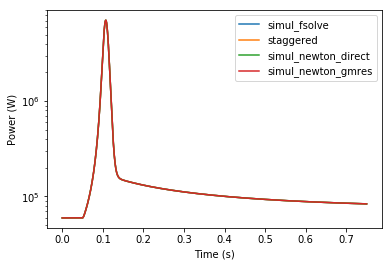

In [3]:
x = np.linspace(0,15*0.05,np.size(struct_newton_direct[0]))
plt.yscale('log')
plt.plot(x,struct_fsolve[0],label='simul_fsolve')
plt.plot(x,staggered_struct[0],label='staggered')
plt.plot(x,struct_newton_direct[0],label='simul_newton_direct')
plt.plot(x,struct_newton_gmres[0],label='simul_newton_gmres')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')

In [3]:
def line_func(x,y):
    A = np.zeros((4,2))
    b = np.zeros(4)
    for i in range(4):
        A[i][0] = np.log(t[i])
        A[i][1] = 1
        b[i] = np.log(y[i])
    b = np.dot(A.T,b)
    A = np.dot(A.T,A)
    slope, y_int = np.linalg.solve(A,b)
    return slope, y_int

In [4]:
R = np.array([])
t = np.array([1e-4,1e-4/2,1e-4/4,1e-4/8])
for i in t:
    struct = drivers.driver(i,staggered=False,it_solve=True,mode='newton')
    diff = np.abs(np.max(struct_newton_direct[0]) - np.max(struct[0]))
    R = np.append(R,diff)

Text(0, 0.5, 'log(Analytic - Numerical)')

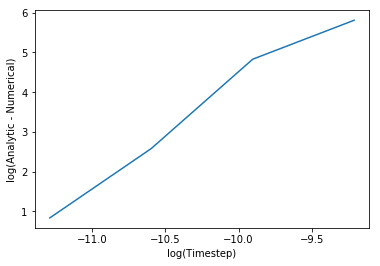

In [5]:
plt.plot(np.log(t),np.log(R))
plt.xlabel('log(Timestep)')
plt.ylabel('log(Analytic - Numerical)')

In [6]:
print(line_func(t,R))

(2.47666040305293, 28.90195715525107)


In [7]:
R = np.array([])
t = np.array([1e-4,1e-4/2,1e-4/4,1e-4/8])
for i in t:
    struct = drivers.driver(i,staggered=False,it_solve=True,mode='newton',lin_solve='gmres')
    diff = np.abs(np.max(struct_newton_gmres[0]) - np.max(struct[0]))
    R = np.append(R,diff)

Text(0, 0.5, 'log(Analytic - Numerical)')

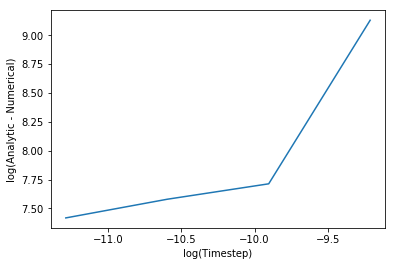

In [8]:
plt.plot(np.log(t),np.log(R))
plt.xlabel('log(Timestep)')
plt.ylabel('log(Analytic - Numerical)')

In [9]:
print(line_func(t,R))

(0.760705930021396, 15.75701540688833)


In [10]:
R = np.array([])
t = np.array([1e-4,1e-4/2,1e-4/4,1e-4/8])
for i in t:
    struct = drivers.driver(i,staggered=False,it_solve=True)
    diff = np.abs(np.max(struct_fsolve[0]) - np.max(struct[0]))
    R = np.append(R,diff)

Text(0, 0.5, 'log(Analytic - Numerical)')

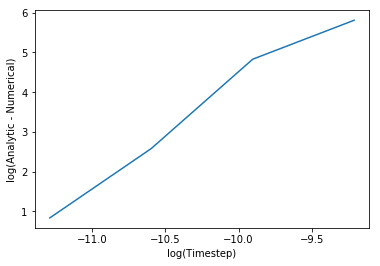

In [11]:
plt.plot(np.log(t),np.log(R))
plt.xlabel('log(Timestep)')
plt.ylabel('log(Analytic - Numerical)')

In [12]:
print(line_func(t,R))

(2.4766604538019816, 28.901957667929075)
